In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [6]:
def get_winner(class1):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = len(numbers)

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 4435
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 50)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []
classes = [[0],[1],[2],[3],[4],[5]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1072
number of class2:3363

 ****** Running generation 0 ****** 

Population's average fitness: 0.61935 stdev: 0.21589
Best fitness: 0.90079 - size: (2, 7) - species 2 - id 56
Average adjusted fitness: 0.354
Mean genetic distance 2.845, standard deviation 0.508
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 11.604 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64929 stdev: 0.20134
Best fitness: 0.90079 - size: (2, 7) - species 1 - id 56
Average adjusted fitness: 0.439
Mean genetic distance 3.000, standard deviation 0.507
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 11.477 sec (11.540 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65396 stdev: 0.20299
Best fitness: 0.90079 - size: (2, 7) - species 10 - id 56
Average adjusted fitness: 0.472
Mean genetic distance 2.979, standard deviation 0.507
Population of 201 members in 28 species
Total extinctio

Population's average fitness: 0.66144 stdev: 0.21056
Best fitness: 0.95964 - size: (5, 13) - species 5 - id 3283
Average adjusted fitness: 0.416
Mean genetic distance 3.085, standard deviation 0.579
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 14.230 sec (14.311 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66473 stdev: 0.21564
Best fitness: 0.95964 - size: (5, 13) - species 5 - id 3283
Average adjusted fitness: 0.419
Mean genetic distance 3.080, standard deviation 0.581
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 14.143 sec (14.109 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66184 stdev: 0.21341
Best fitness: 0.95964 - size: (5, 13) - species 5 - id 3283
Average adjusted fitness: 0.568
Mean genetic distance 3.043, standard deviation 0.593
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 13.336 sec (14.042 average)

 ***

Population's average fitness: 0.68456 stdev: 0.21445
Best fitness: 0.96257 - size: (5, 13) - species 5 - id 7405
Average adjusted fitness: 0.444
Mean genetic distance 3.172, standard deviation 0.558
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 16.064 sec (15.601 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65337 stdev: 0.23837
Best fitness: 0.96257 - size: (5, 13) - species 5 - id 7405
Average adjusted fitness: 0.448
Mean genetic distance 3.196, standard deviation 0.543
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 16.971 sec (15.775 average)
number of class1:479
number of class2:3956

 ****** Running generation 0 ****** 

Population's average fitness: 0.69192 stdev: 0.34214
Best fitness: 0.97768 - size: (2, 7) - species 3 - id 168
Average adjusted fitness: 0.735
Mean genetic distance 2.837, standard deviation 0.502
Population of 199 members in 17 species
Total extinctions: 0
Generation

Population's average fitness: 0.68715 stdev: 0.35773
Best fitness: 0.98602 - size: (5, 13) - species 15 - id 2159
Average adjusted fitness: 0.650
Mean genetic distance 3.135, standard deviation 0.553
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 14.131 sec (13.822 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.73360 stdev: 0.34343
Best fitness: 0.98602 - size: (5, 13) - species 15 - id 2159
Average adjusted fitness: 0.703
Mean genetic distance 3.111, standard deviation 0.561
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 14.297 sec (13.925 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.73832 stdev: 0.33970
Best fitness: 0.98602 - size: (5, 13) - species 15 - id 2159
Average adjusted fitness: 0.613
Mean genetic distance 3.130, standard deviation 0.561
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 14.409 sec (14.036 average)

 

Population's average fitness: 0.71233 stdev: 0.34840
Best fitness: 0.98602 - size: (5, 13) - species 15 - id 2159
Average adjusted fitness: 0.568
Mean genetic distance 3.218, standard deviation 0.601
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 17.069 sec (17.505 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.69366 stdev: 0.36121
Best fitness: 0.98602 - size: (5, 13) - species 15 - id 2159
Average adjusted fitness: 0.648
Mean genetic distance 3.222, standard deviation 0.580
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 17.478 sec (17.550 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.70271 stdev: 0.36198
Best fitness: 0.98602 - size: (5, 13) - species 15 - id 2159
Average adjusted fitness: 0.585
Mean genetic distance 3.213, standard deviation 0.571
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 17.662 sec (17.523 average)

 

Population's average fitness: 0.67735 stdev: 0.20740
Best fitness: 0.78467 - size: (2, 6) - species 2 - id 3288
Average adjusted fitness: 0.450
Mean genetic distance 2.855, standard deviation 0.614
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 13.054 sec (13.317 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.68234 stdev: 0.20363
Best fitness: 0.78467 - size: (2, 6) - species 2 - id 3288
Average adjusted fitness: 0.478
Mean genetic distance 2.842, standard deviation 0.580
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 13.051 sec (13.423 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.71426 stdev: 0.17606
Best fitness: 0.78467 - size: (2, 6) - species 2 - id 3288
Average adjusted fitness: 0.505
Mean genetic distance 2.857, standard deviation 0.588
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 13.165 sec (13.043 average)

 ******

Population's average fitness: 0.68897 stdev: 0.20215
Best fitness: 0.78467 - size: (2, 6) - species 2 - id 3288
Average adjusted fitness: 0.468
Mean genetic distance 3.207, standard deviation 0.632
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 13.139 sec (14.153 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.67238 stdev: 0.21270
Best fitness: 0.78467 - size: (2, 6) - species 2 - id 3288
Average adjusted fitness: 0.457
Mean genetic distance 3.247, standard deviation 0.623
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 13.121 sec (13.992 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.70358 stdev: 0.18514
Best fitness: 0.78467 - size: (2, 6) - species 2 - id 3288
Average adjusted fitness: 0.490
Mean genetic distance 3.244, standard deviation 0.629
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 12.924 sec (13.702 average)

 ******

Population's average fitness: 0.79611 stdev: 0.26491
Best fitness: 0.90665 - size: (5, 12) - species 25 - id 2221
Average adjusted fitness: 0.661
Mean genetic distance 2.987, standard deviation 0.544
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 12.799 sec (12.158 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.75651 stdev: 0.29870
Best fitness: 0.90665 - size: (5, 12) - species 36 - id 2221
Average adjusted fitness: 0.688
Mean genetic distance 3.011, standard deviation 0.542
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 14.700 sec (12.439 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.78006 stdev: 0.27669
Best fitness: 0.90665 - size: (5, 12) - species 36 - id 2221
Average adjusted fitness: 0.683
Mean genetic distance 3.064, standard deviation 0.536
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 13.401 sec (12.606 average)

 

Population's average fitness: 0.79115 stdev: 0.27073
Best fitness: 0.90710 - size: (7, 16) - species 36 - id 5213
Average adjusted fitness: 0.724
Mean genetic distance 2.995, standard deviation 0.601
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 15.336 sec (16.335 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.80218 stdev: 0.25799
Best fitness: 0.90710 - size: (7, 16) - species 36 - id 5213
Average adjusted fitness: 0.710
Mean genetic distance 2.981, standard deviation 0.564
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 15.494 sec (16.593 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.80449 stdev: 0.26227
Best fitness: 0.90710 - size: (7, 16) - species 36 - id 5213
Average adjusted fitness: 0.654
Mean genetic distance 2.992, standard deviation 0.578
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 15.627 sec (16.846 average)

 

Population's average fitness: 0.77316 stdev: 0.26924
Best fitness: 0.91161 - size: (3, 9) - species 3 - id 2570
Average adjusted fitness: 0.685
Mean genetic distance 2.956, standard deviation 0.550
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 14.781 sec (13.542 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72705 stdev: 0.30364
Best fitness: 0.91161 - size: (3, 9) - species 3 - id 2570
Average adjusted fitness: 0.611
Mean genetic distance 2.959, standard deviation 0.555
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 14.738 sec (13.712 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71736 stdev: 0.31456
Best fitness: 0.91657 - size: (3, 10) - species 9 - id 2815
Average adjusted fitness: 0.577
Mean genetic distance 2.977, standard deviation 0.565
Population of 205 members in 22 species
Total extinctions: 0
Generation time: 12.477 sec (13.660 average)

 *****

Population's average fitness: 0.79430 stdev: 0.24481
Best fitness: 0.93055 - size: (4, 11) - species 41 - id 4523
Average adjusted fitness: 0.689
Mean genetic distance 3.134, standard deviation 0.582
Population of 206 members in 23 species
Total extinctions: 0
Generation time: 12.603 sec (13.289 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.76692 stdev: 0.27190
Best fitness: 0.93055 - size: (4, 11) - species 41 - id 4523
Average adjusted fitness: 0.652
Mean genetic distance 3.160, standard deviation 0.594
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 13.726 sec (13.283 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.75911 stdev: 0.28429
Best fitness: 0.93055 - size: (4, 11) - species 41 - id 4523
Average adjusted fitness: 0.640
Mean genetic distance 3.159, standard deviation 0.602
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.231 sec (13.326 average)

 

Population's average fitness: 0.68667 stdev: 0.18209
Best fitness: 0.83653 - size: (4, 8) - species 25 - id 1028
Average adjusted fitness: 0.448
Mean genetic distance 3.009, standard deviation 0.514
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 12.935 sec (12.833 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.67150 stdev: 0.19622
Best fitness: 0.84690 - size: (5, 10) - species 25 - id 2487
Average adjusted fitness: 0.438
Mean genetic distance 3.032, standard deviation 0.519
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 13.264 sec (12.984 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68284 stdev: 0.18769
Best fitness: 0.84690 - size: (5, 10) - species 25 - id 2487
Average adjusted fitness: 0.442
Mean genetic distance 3.070, standard deviation 0.529
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.950 sec (13.044 average)

 *

Generation time: 16.166 sec (15.871 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.65717 stdev: 0.21296
Best fitness: 0.84690 - size: (5, 10) - species 25 - id 2487
Average adjusted fitness: 0.424
Mean genetic distance 3.183, standard deviation 0.589
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 16.824 sec (15.968 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.63292 stdev: 0.22094
Best fitness: 0.84690 - size: (5, 10) - species 25 - id 2487
Average adjusted fitness: 0.399
Mean genetic distance 3.138, standard deviation 0.588
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 18.094 sec (16.011 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.65745 stdev: 0.20945
Best fitness: 0.84690 - size: (5, 10) - species 25 - id 2487
Average adjusted fitness: 0.425
Mean genetic distance 3.138, standard deviation 0.585
Population of 194 membe

In [8]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [9]:
test_df = pd.read_csv('sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
pred_value = []
error_list = []

for j in range(2000):
    pred = []
    for i in range(6):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    pred_array = np.array(pred).reshape(6,)
    #print(pred_array)
    if (np.sum(pred_array) >= 1):
        pred_value.append(np.where(pred_array==1))
    else:
        pred_value.append(np.array(range(6)))

    #print(vote)

In [14]:
import random

list_P = []
for i in range(2000):
    if (len(pred_value[i])== 1):
        #print(pred_value[i][0], digits.target[1617+i])
        list_P.append(random.sample(pred_value[i][0].tolist(),1)[0])
    else:
        list_P.append(random.sample(pred_value[i].tolist(),1)[0])
np.sum(list_P == testy)/2000

0.5935

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[423  10  59  12  24   9]
 [  7 196  59  24  11  19]
 [  5   2  54  19   7  23]
 [  5   1  59  20   2  19]
 [ 13   9  70  40 129  35]
 [  8   6  96  96  64 365]]


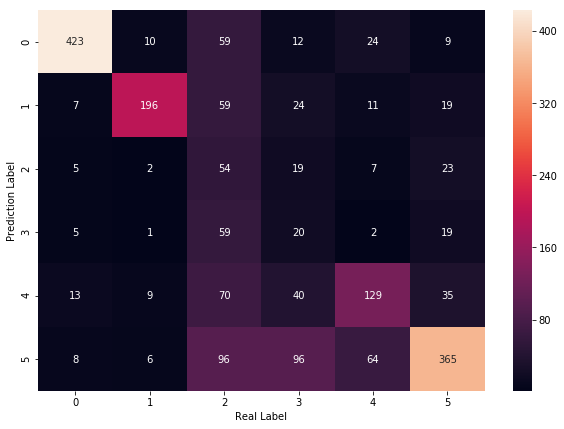

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()